In [1]:
import pandas as pd
import boxball_loader as bbl
import baseball_stats_utils as bsu


In [2]:
careers = bbl.load_pitching(coalesce_type=bbl.CoalesceMode.PLAYER_CAREER, drop_cols=['bfp']).sort_values('bfp', ascending=False)
careers

,w,l,g,gs,cg,sho,sv,ip_outs,h,er,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,gidp
player_id,,,,,,,,,,,,,,,,,,,,,
youngcy01,511,315,906,815,749,76,18,22068,7092,2147,...,0.0,156,161.0,3,29579.0,84,3167,0.0,0.0,0.0
galvipu01,365,310,705,688,646,57,2,18010,6405,1903,...,0.0,221,61.0,2,25415.0,19,3352,0.0,0.0,0.0
johnswa01,417,279,802,666,531,110,34,17744,4913,1424,...,0.0,155,203.0,4,23642.0,129,1902,0.0,0.0,0.0
niekrph01,318,274,864,716,245,45,29,16213,5044,2012,...,86.0,226,123.0,42,22677.0,83,2337,167.0,87.0,292.0
ryanno01,324,292,807,773,222,61,3,16158,3923,1911,...,78.0,277,158.0,33,22575.0,13,2178,191.0,140.0,263.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
valenda01,0,0,1,0,0,0,0,1,0,0,...,0.0,0,0.0,0,1.0,1,0,0.0,0.0,0.0
kellydo01,0,0,1,0,0,0,0,1,0,0,...,0.0,0,0.0,0,1.0,1,0,0.0,0.0,0.0
chaseha01,0,0,1,0,0,0,0,1,0,0,...,0.0,0,0.0,0,1.0,0,0,0.0,0.0,0.0


In [3]:
careers['k_rt'] = careers['so']/careers['bfp']
cummax_k_rt = careers['k_rt'].cummax()
all_time_leaders = careers.query('k_rt == @cummax_k_rt') \
    [['bfp', 'so', 'k_rt']] \
    .sort_values('k_rt', ascending=False)
all_time_leaders['name'] = bsu.get_player_names_df(all_time_leaders, 'player_id')
all_time_leaders

,bfp,so,k_rt,name
player_id,,,,
sheldsc01,1.0,1,1.000000,Scott Sheldon
seitzke01,1.0,1,1.000000,Kevin Seitzer
valenda01,1.0,1,1.000000,Danny Valencia
niesoch01,8.0,5,0.625000,Chuck Nieson
karinja01,131.0,61,0.465649,James Karinchak
haderjo01,861.0,380,0.441347,Josh Hader
chapmar01,2196.0,905,0.412113,Aroldis Chapman
kimbrcr01,2252.0,926,0.411190,Craig Kimbrel
janseke01,2502.0,936,0.374101,Kenley Jansen


In [4]:
def write_output_row(row):
    name = row['name']
    kpct = 100*row["k_rt"]
    k = int(row['so'])
    bfp = int(row['bfp'])
    print(f'{name:<18} {kpct:>6.1f}% {k:>5} {bfp:>6}');

all_time_leaders.apply(write_output_row, axis=1)
None

Scott Sheldon       100.0%     1      1
Kevin Seitzer       100.0%     1      1
Danny Valencia      100.0%     1      1
Chuck Nieson         62.5%     5      8
James Karinchak      46.6%    61    131
Josh Hader           44.1%   380    861
Aroldis Chapman      41.2%   905   2196
Craig Kimbrel        41.1%   926   2252
Kenley Jansen        37.4%   936   2502
Billy Wagner         33.2%  1196   3600
Chris Sale           30.7%  2007   6544
Max Scherzer         29.1%  2784   9573
Randy Johnson        28.6%  4875  17067
Nolan Ryan           25.3%  5714  22575
Walter Johnson       14.8%  3509  23642
Cy Young              9.5%  2803  29579


<AxesSubplot:xlabel='bfp'>

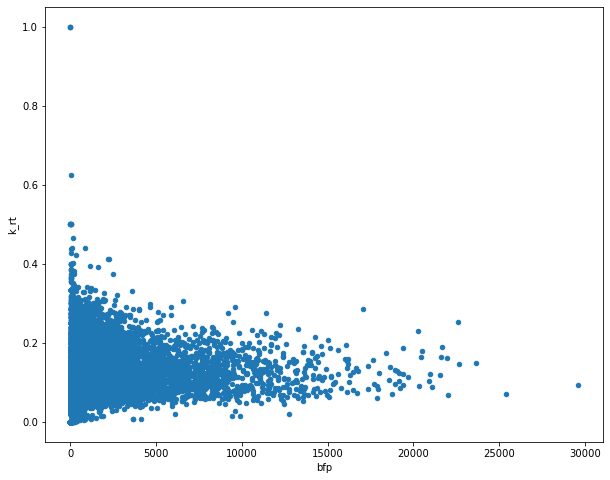

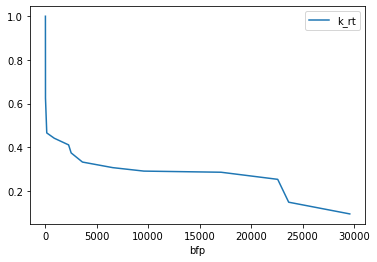

In [5]:
careers.plot.scatter(x='bfp', y='k_rt', figsize=(10,8))
all_time_leaders.plot.line(x='bfp', y='k_rt')

<AxesSubplot:xlabel='bfp', ylabel='so'>

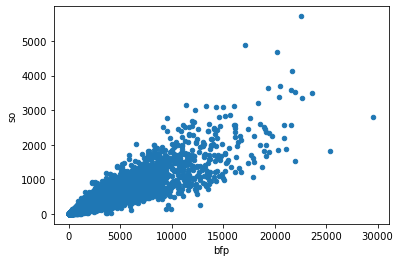

In [6]:
careers.plot.scatter(x='bfp', y='so')